<a href="https://colab.research.google.com/github/pduyn308/ANN/blob/Flowers-Recognition/Flower_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import kagglehub

path = kagglehub.dataset_download("alxmamaev/flowers-recognition")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/flowers-recognition


In [39]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Chỉ chọn 5 loài hoa
flower_classes = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
image_size = 64

data = []
labels = []

# Load ảnh và gán nhãn
for i, flower in enumerate(flower_classes):
    folder = os.path.join(path, 'flowers', flower)
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        try:
            img = cv2.imread(img_path)
            img = cv2.resize(img, (image_size, image_size))
            img = img / 255.0
            data.append(img.flatten())
            labels.append(i)
        except:
            continue

data = np.array(data)
labels = to_categorical(labels, num_classes=len(flower_classes))

# Chia train/test
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)



In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(512, activation='relu', input_shape=(image_size * image_size * 3,)),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(len(flower_classes), activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 11s 83ms/step - accuracy: 0.3347 - loss: 1.4899 - val_accuracy: 0.3935 - val_loss: 1.3524
Epoch 2/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 11s 85ms/step - accuracy: 0.3566 - loss: 1.4398 - val_accuracy: 0.3796 - val_loss: 1.3902
Epoch 3/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 10s 86ms/step - accuracy: 0.3399 - loss: 1.4744 - val_accuracy: 0.3877 - val_loss: 1.4179
Epoch 4/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 10s 85ms/step - accuracy: 0.3379 - loss: 1.4812 - val_accuracy: 0.3310 - val_loss: 1.4313
Epoch 5/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 9s 83ms/step - accuracy: 0.3431 - loss: 1.4348 - val_accuracy: 0.3958 - val_loss: 1.4134
Epoch 6/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 9s 84ms/step - accuracy: 0.3593 - loss: 1.4518 - val_accuracy: 0.3553 - val_loss: 1.3645
Epoch 7/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 10s 96ms/step - accuracy: 0.3881 - loss: 1.3590 - val_accuracy: 0.4120 - val_loss: 1.3323
Epoch 8/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 11s 101ms/step - accuracy: 0.3774 - loss: 1.3515 - v

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


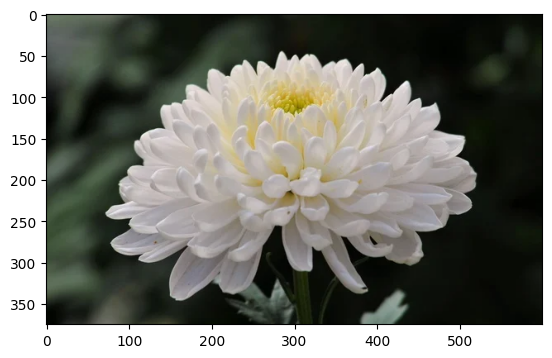

Predicted flower: daisy


In [49]:
import cv2

def preprocess_image(image_path, image_size=64):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (image_size, image_size))
    img = img / 255.0
    img = img.flatten()
    return np.expand_dims(img, axis=0)

image_path = '/content/cúc trắng.webp'
processed_image = preprocess_image(image_path)
predictions = model.predict(processed_image)
predicted_class = np.argmax(predictions)


img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
print(f"Predicted flower: {flower_classes[predicted_class]}")